# 365Career's Data Science Bootcamp exercise on data cleaning and data analysis. 
## The point of the exercise is to improve a given model that predicts used car prices. 
### By adding a car model variable, the predicting power of said model is believed to rise! 

#### Let's go!

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [3]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
raw_data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Pre-processing

In [6]:
# There are some missing values, so we'll address this issue first.
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [21]:
##Since there are not as many MV as there are observations (less than 5%), we should be okay
data_no_mv = raw_data.dropna(axis=0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Checking the PDFs

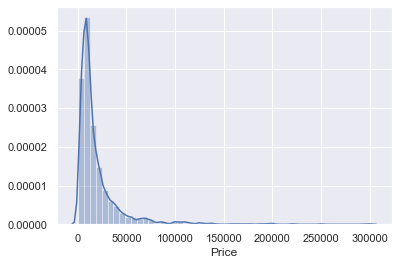

In [9]:
sns.distplot(data_no_mv['Price'])

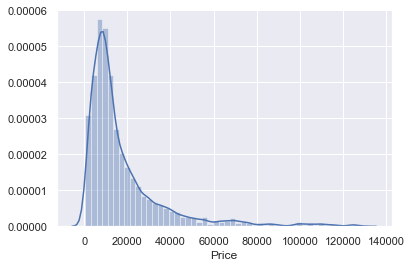

In [24]:
## Not normally distributed. When checking for OLS assumptions, we should LOG it, so we don't run into non-linearity.




q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]

sns.distplot(data_1['Price'])

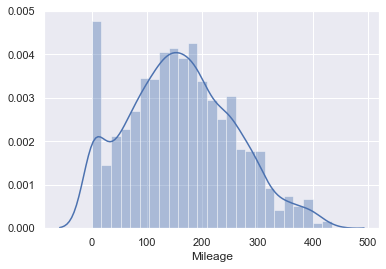

In [28]:

# There are also some outliers in Mileage and EngineV.

q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

sns.distplot(data_2['Mileage'])

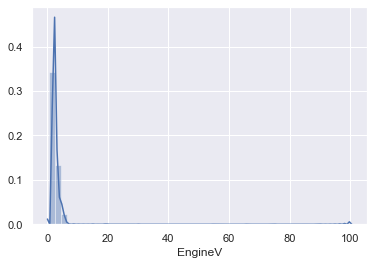

In [29]:
data_3 = data_2[data_2['EngineV']<6.5]

sns.distplot(data_1['EngineV'])

In [31]:
# Year also has some outliers that inflate the regression coef. Let's drop the oldest vehicles.

q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

In [35]:
data_clean = data_4.reset_index(drop=True)
data_clean.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


## Checking for OLS Assumptions

## Non-linearity

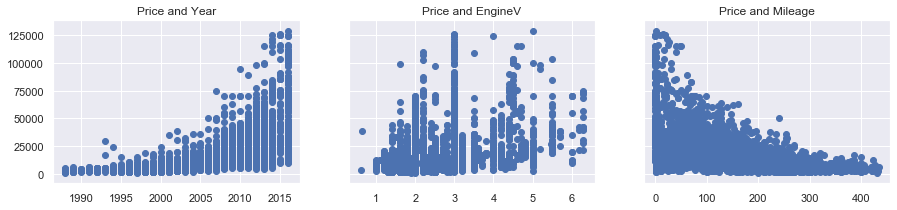

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_clean['Year'],data_clean['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_clean['EngineV'],data_clean['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_clean['Mileage'],data_clean['Price'])
ax3.set_title('Price and Mileage')


plt.show()

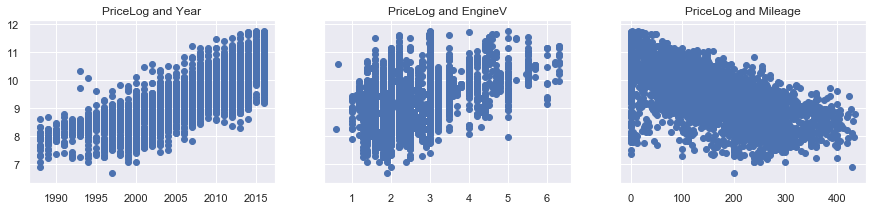

In [42]:
## As we see, they are not linear. So, we should relax by logging the 'Price'!

data_clean['price_log'] = np.log(data_clean['Price'])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'price_log' as y
ax1.scatter(data_clean['Year'],data_clean['price_log'])
ax1.set_title('PriceLog and Year')
ax2.scatter(data_clean['EngineV'],data_clean['price_log'])
ax2.set_title('PriceLog and EngineV')
ax3.scatter(data_clean['Mileage'],data_clean['price_log'])
ax3.set_title('PriceLog and Mileage')


plt.show()

# This should address non-linearity

## Multicolinearity

In [43]:
#Beforehand, we should process our categorical data by creating Dummy Variables

data_with_dummies = pd.get_dummies(data_clean, drop_first=True)
data_with_dummies

,Price,Mileage,EngineV,Year,price_log,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,8.342840,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7900.0,427,2.9,1999,8.974618,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13300.0,358,5.0,2003,9.495519,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23000.0,240,4.2,2007,10.043249,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18300.0,120,2.0,2011,9.814656,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,2008,9.350102,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3863,17900.0,35,1.6,2014,9.792556,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3864,125000.0,9,3.0,2014,11.736069,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3865,6500.0,1,3.5,1999,8.779557,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [53]:
# We should drop Year! 
data_no_mltcln = data_with_dummies.drop(['Year'],axis=1)
data_no_mltcln.columns.values

array(['Price', 'Mileage', 'EngineV', 'price_log', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 

In [55]:
cols = ['price_log', 'Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,price_log,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,4200.0,277,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,7900.0,427,2.9,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,13300.0,358,5.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,23000.0,240,4.2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,18300.0,120,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Linear Regression Model

In [58]:
target = data_preprocessed['price_log']
inputs = data_preprocessed.drop(['price_log', 'Price'],axis=1)

In [59]:
## We should scale the data now

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
inputs_scaled = scaler.transform(inputs)

## No overfitting -> Train/test split

In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2)

### Linear regression creation

In [64]:
reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

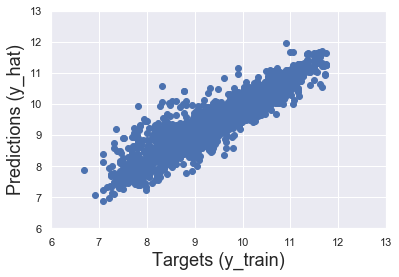

In [65]:
#predictions will go in this variable, as it's the name for 'Yˆ'
y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

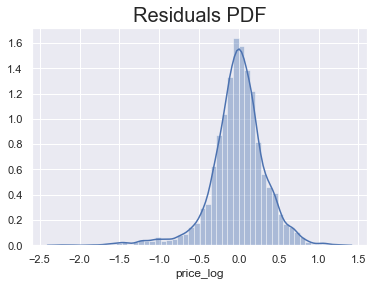

In [66]:
# Checking for residuals
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=20)

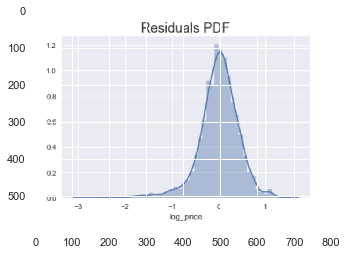

In [71]:
# The results are great. There are less observations to the left of the mean as there were in the other model.
# Check out:


import matplotlib.image as mpimg
img=mpimg.imread('img_1.jpg')
imgplot = plt.imshow(img)
plt.show()

In [72]:
reg.score(x_train,y_train)

0.8432293874209928

In [73]:
#The R score is significantly greater than the previous one, which was '0.744996578792662'. 

# When including car models, the model's predictive power rises!

In [74]:
reg.intercept_

437970719894.43646

In [76]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.565302e-01
1,EngineV,2.233300e-02
2,Brand_BMW,3.036660e+11
3,Brand_Mercedes-Benz,3.272078e+11
4,Brand_Mitsubishi,-2.793092e+12
...,...,...
302,Model_X6,1.696167e-01
303,Model_X6 M,5.557251e-02
304,Model_Yaris,2.379037e+11
305,Model_Z3,1.133307e+12


## Testing

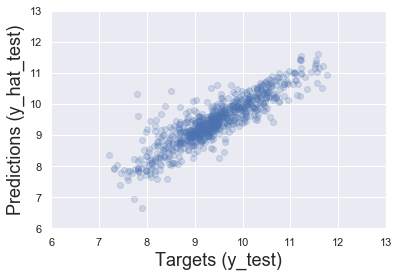

In [77]:
y_hat_test = reg.predict(x_test)

plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [78]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


,Prediction
0,14029.101927
1,6978.050804
2,24528.843271
3,9104.983213
4,2756.430693


In [80]:
#Lets reset the index for the test Y, since it has been moved during flight.

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,14029.101927,12900.0
1,6978.050804,5950.0
2,24528.843271,19500.0
3,9104.983213,8100.0
4,2756.430693,2650.0
...,...,...
769,3167.214931,3900.0
770,9844.233323,12500.0
771,5354.504024,9700.0
772,18114.053625,34000.0


In [81]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [84]:
# Let's evaluate the predictions by percentage difference!

pd.options.display.max_rows = 999
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
530,2.400162e+04,24000.00,-1.616587e+00,0.006736
651,9.414096e+03,9400.00,-1.409562e+01,0.149953
664,1.297321e+04,12950.00,-2.321453e+01,0.179263
465,1.452931e+04,14500.00,-2.931105e+01,0.202145
489,1.473291e+04,14700.00,-3.291456e+01,0.223909
64,6.916989e+03,6900.00,-1.698901e+01,0.246218
747,8.270471e+03,8250.00,-2.047132e+01,0.248137
751,3.913615e+03,3900.00,-1.361507e+01,0.349104
654,7.626559e+03,7600.00,-2.655938e+01,0.349466
357,1.343086e+04,13499.00,6.814355e+01,0.504804


# End of exercise!

## By adding the car model variables in the model, we have significantly improved its <br> predictive power, albeit it is far from perfect. Sugestions of improving would be adding the <br> car state, if broken or mint. Also, bigger dataset should result in a more accurate model. <br> <br> Thank you for coming this far! This has been one of my first basic Data Science projects, as i just started graduate studies on Mackenzie Presbyterian University.